### CSE-221710302060-Shaik Shoaib Aslam

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Reading dataset
df = pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Advertising.csv',index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Question 1

### 1. Perform all the necessary data preprocessing steps required


In [5]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#### No null values found

In [6]:
df[df.duplicated()]

,TV,radio,newspaper,sales


#### No Duplicate Values Found

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [9]:
df.dtypes.value_counts()

float64    4
dtype: int64

In [10]:
df.shape

(200, 4)

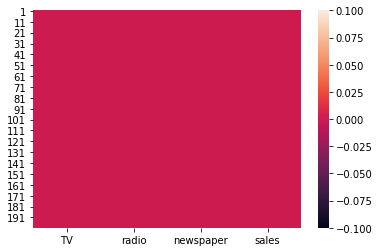

In [11]:
#visualizing heatmap for null values
sns.heatmap(df.isna())

#### Observations : No Null Values found

## Question 2

### 2. Visualize the relationship between the features and the response using scatterplot

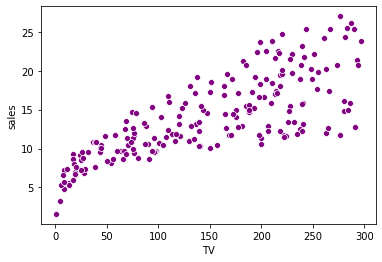

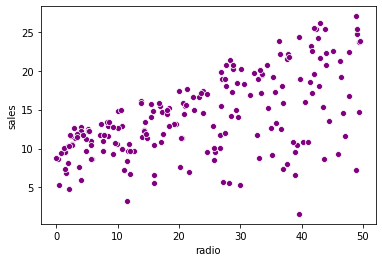

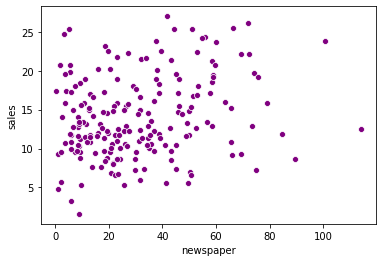

In [19]:
# Iterating through list of column names 
cols=df.columns.to_list()[0:3]
for i in range(len(cols)):
    p=sns.scatterplot(x=cols[i], y='sales', data=df,color = 'purple')
    plt.show()

## Question 3

### 3. Check for correlation and observe if there is  any multicollinearity.


In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


#### No Input Columns are not Strongly multicollinearity

## Question 4

### 4. After building a Linear Regression Model, write down the interpretation of the model

In [24]:
# Splitting data into Input and Output
X = df.drop(['sales'],axis = 1)
y = df['sales']

In [25]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_train_pred = lr.predict(X_train)
y_train_pred

array([ 3.65921577,  7.25612637,  6.00481636, 18.46169785,  8.37406584,
       14.12454209, 15.0161764 , 20.40205426, 20.61382233, 19.61731651,
       24.16323248, 14.88403603,  6.73108467, 19.86205547, 18.92113796,
       12.49612522, 14.17816602,  6.11982211, 15.33821244,  9.59951578,
       12.04789746, 12.04846338,  8.52368581, 21.61141557, 23.30426145,
       12.24026439,  6.68855681, 17.80465348, 16.50075138,  8.78138524,
       20.39682769, 20.67376942, 24.24311844, 10.16119323, 10.51556751,
       16.43194712, 10.46014901,  6.66787113, 21.36473141, 14.43134771,
       15.49693622, 10.09789459, 14.96838524, 13.86965306,  8.38839734,
        8.85070713, 10.14373392,  8.16326623, 17.03095529, 15.20888698,
       16.80513965, 23.24354445, 13.44178745,  9.88629559, 18.11788026,
       14.82702155,  5.393657  , 12.87619027, 11.91409761, 12.09709362,
       11.73318833, 14.99985124,  4.60082043, 16.36095126, 12.08805647,
       17.79795119, 15.41316291, 18.63426135, 11.5184553 , 13.89

In [29]:
# Checking Performance on traning data
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R^2 :', r2_score(y_train,y_train_pred))
print('Adjusted R^2 :',1 - (1 - r2_score(y_train,y_train_pred))*(len(X_train)-1)/(len(X_train)-X_train.shape[1]-1) )

print('MAE:', mean_absolute_error(y_train, y_train_pred))

print('MSE:', mean_squared_error(y_train, y_train_pred))

print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)))


R^2 : 0.8959372632325174
Adjusted R^2 : 0.8939360567562197
MAE: 1.328850246099838
MSE: 3.0168306076596774
RMSE 1.736902590147092


In [30]:
lr.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([22.69296752, 16.17326373,  7.25272848, 16.62359925, 18.04090895,
       23.69615013, 16.53941976, 12.46152804,  9.3078337 , 16.79375666,
       14.18886471, 10.45096643, 17.26907139, 18.07474309, 13.71050927,
       16.01932838, 12.38473981, 15.7801898 , 12.97092122, 18.32086498,
        9.34400411, 13.33149799,  9.65406622, 10.57615866, 11.36221842,
       14.68838038, 10.67641642, 19.21596667, 19.43411002, 16.48946084,
       22.17427156, 12.75077257, 17.26072794, 11.52498102, 19.92711301,
       15.23567956, 12.8110926 ,  9.41872753, 21.71678082,  8.35521836])

In [32]:
# Checking Performance on traning data
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R^2 :', r2_score(y_test,y_test_pred))
print('Adjusted R^2 :',1 - (1 - r2_score(y_test,y_test_pred))*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1) )

print('MAE:', mean_absolute_error(y_test, y_test_pred))

print('MSE:', mean_squared_error(y_test, y_test_pred))

print('RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred)))


R^2 : 0.9299514931177822
Adjusted R^2 : 0.9241141175442641
MAE: 0.8452345815359891
MSE: 1.3010945387285213
RMSE 1.1406553110946889


#### Linear Regression model is predicting 92% correct values 